In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train1 = pd.read_csv('/content/drive/MyDrive/minor data/train.csv',parse_dates=['date'])
test = pd.read_csv('/content/drive/MyDrive/minor data/test.csv',parse_dates=['date'])

# For feature engineering -> features have to generated both in test and train set
df = pd.concat([train, test], sort=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/minor data/train.csv',parse_dates=['date'], index_col='date')

In [ ]:
train['rolmean'] = train['sales'].rolling(window=12).mean()
train['rolstd'] = train['sales'].rolling(window=12).std()
train

store  item  sales    rolmean     rolstd
date                                                
2013-01-01      1     1     13        NaN        NaN
2013-01-02      1     1     11        NaN        NaN
2013-01-03      1     1     14        NaN        NaN
2013-01-04      1     1     13        NaN        NaN
2013-01-05      1     1     10        NaN        NaN
...           ...   ...    ...        ...        ...
2017-12-27     10    50     63  61.250000  13.239919
2017-12-28     10    50     59  61.833333  12.946276
2017-12-29     10    50     74  60.833333  11.264048
2017-12-30     10    50     62  61.583333  10.991388
2017-12-31     10    50     82  63.916667  12.146517

[913000 rows x 5 columns]

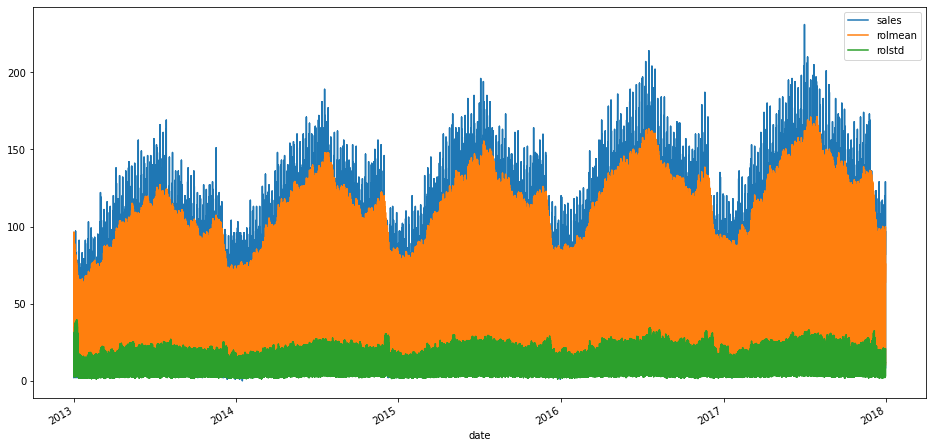

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline
  
plt.show(block=False)

train[['sales', 'rolmean', 'rolstd']].plot(
  label='sales', figsize=(16, 8))

plt.show()

In [ ]:
# It is non stationary as mean and variance is not constanat and is varrying with time 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

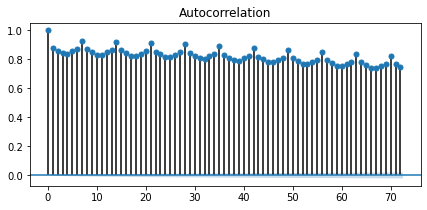

In [ ]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(train['sales'], ax=ax, lags=72)
plt.show()

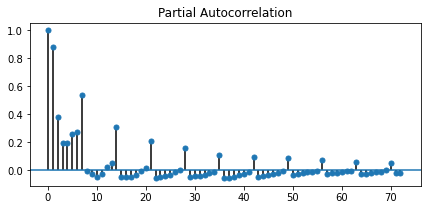

In [ ]:
# Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(train['sales'], ax=ax, lags=72, method='ywm')
plt.show()

KPSS test for stationarity

In [ ]:
stats, p, lags, critical_values = kpss(train['sales'], 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 10.439443093951672
p-value: 0.01
num lags: 118
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [ ]:
#   Null hypothesis --> Series is stationary
#   Alternative hypothesis --> Series is not stationary

# kpss Statistics > Critical value --> reject null hypothesis
# p-value < 0.05    -->    reject null hypothesis

#   ===> Series is non stationary

In [ ]:
if p < 0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

Series is not stationary


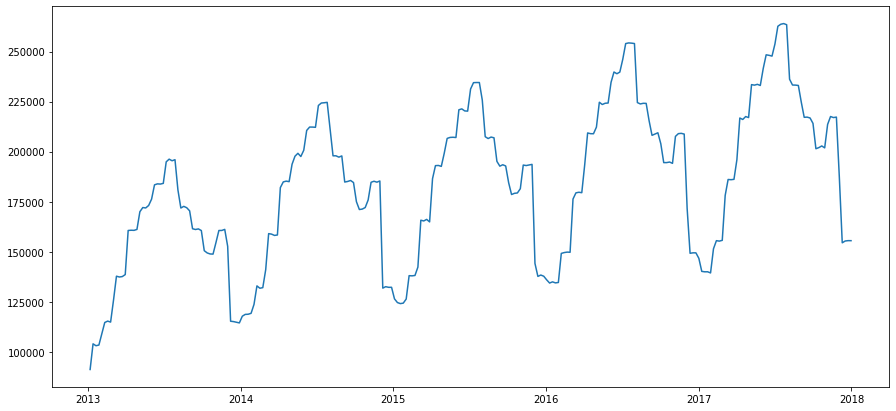

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['sales'].resample('W').sum(),label="sales")
plt.show()

Differencing

In [ ]:
# y(t) = y(t)-y(t-1)

In [ ]:
train['sales1'] = train['sales'] - train['sales'].shift(1)

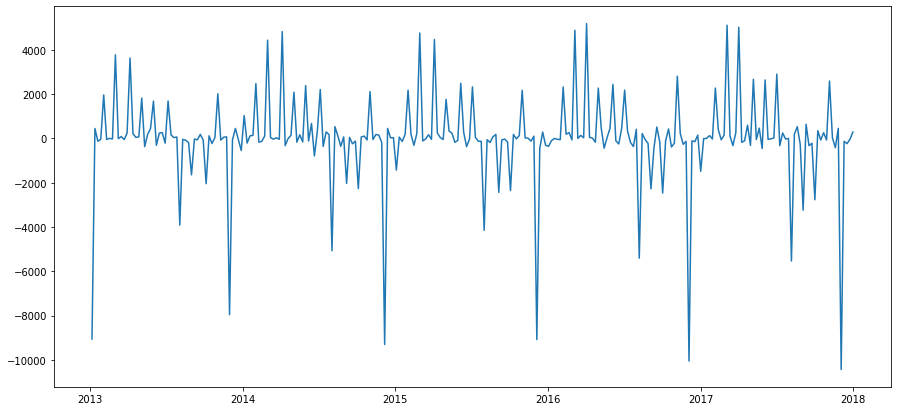

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['sales1'].resample('W').sum(),label="sales")
plt.show()

Seasonal Differencing

In [ ]:
train['sales_diff_7'] = train['sales'] - train['sales'].shift(7)

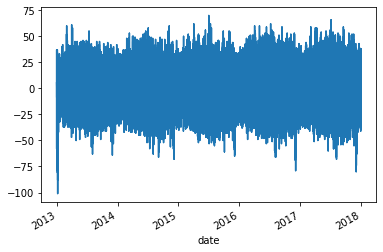

In [ ]:
train['sales_diff_7'].plot()

In [ ]:
train['sales_diff_7'].isnull()

date
2013-01-01     True
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05     True
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: sales_diff_7, Length: 913000, dtype: bool

In [ ]:
train['sales_diff_7'].dropna()

date
2013-01-08    -4.0
2013-01-09     1.0
2013-01-10    -5.0
2013-01-11    -4.0
2013-01-12    -3.0
              ... 
2017-12-27    12.0
2017-12-28    -4.0
2017-12-29    -1.0
2017-12-30    -8.0
2017-12-31     6.0
Name: sales_diff_7, Length: 912993, dtype: float64

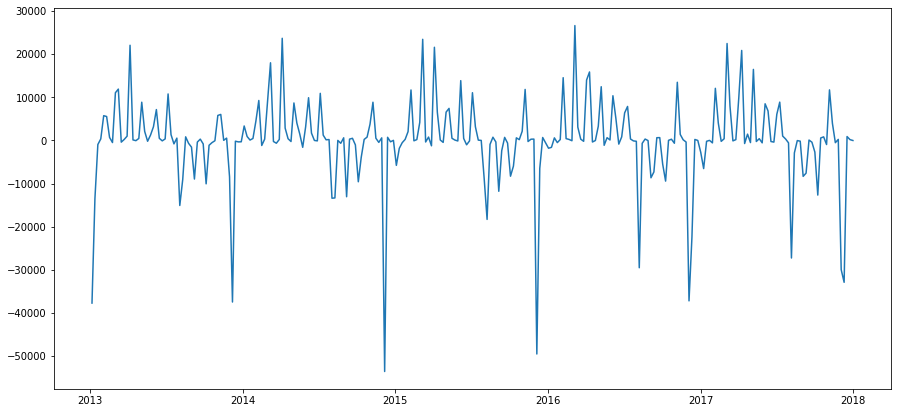

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['sales_diff_7'].resample('W').sum(),label="sales")
plt.show()

Transformation

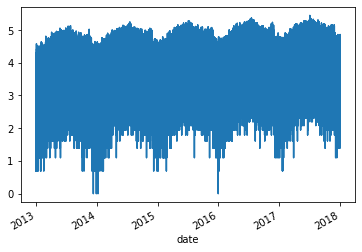

In [ ]:
# calculate log
train['adj_log'] = np.log(train['sales'])
train['adj_log'].dropna().plot()

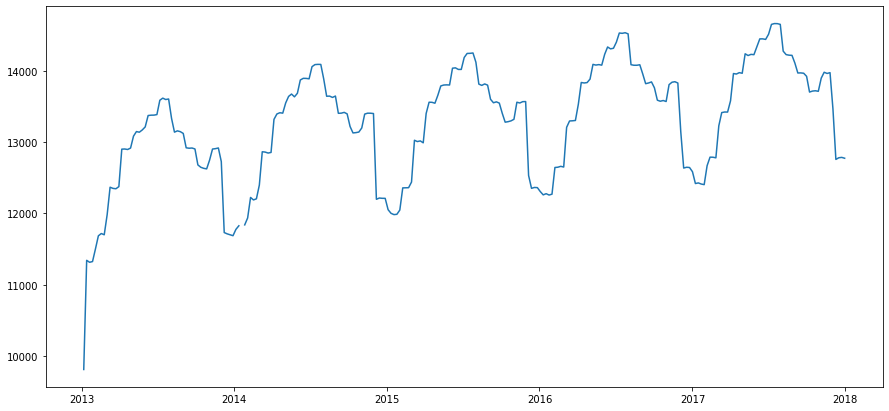

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['adj_log'].resample('W').sum(),label="sales")
plt.show()

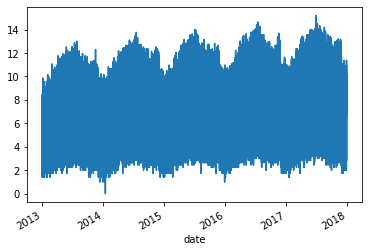

In [ ]:
# calculate sqrt
train['adj_sqrt'] = np.sqrt(train['sales'])
train['adj_sqrt'].plot()

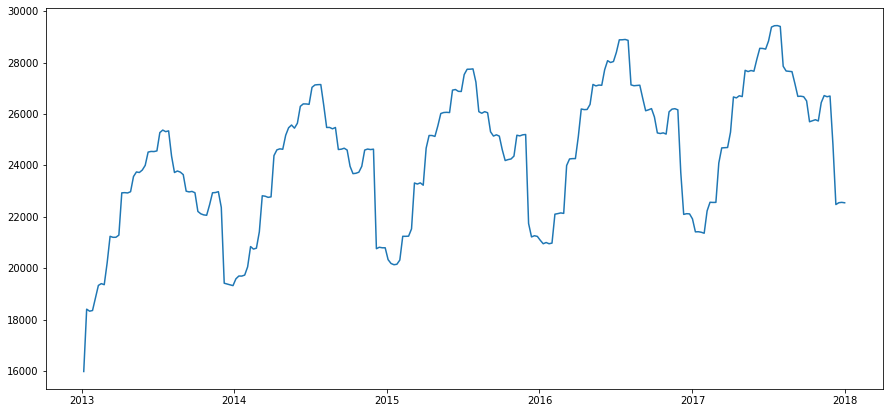

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['adj_sqrt'].resample('W').sum(),label="sales")
plt.show()

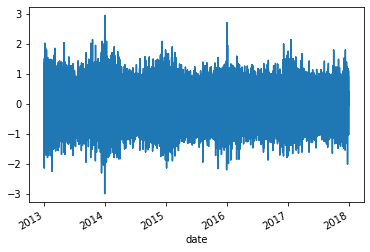

In [ ]:
train['sales_log_diff1'] = train['adj_log'] - train['adj_log'].shift(1)
train['sales_log_diff1'].dropna().plot()

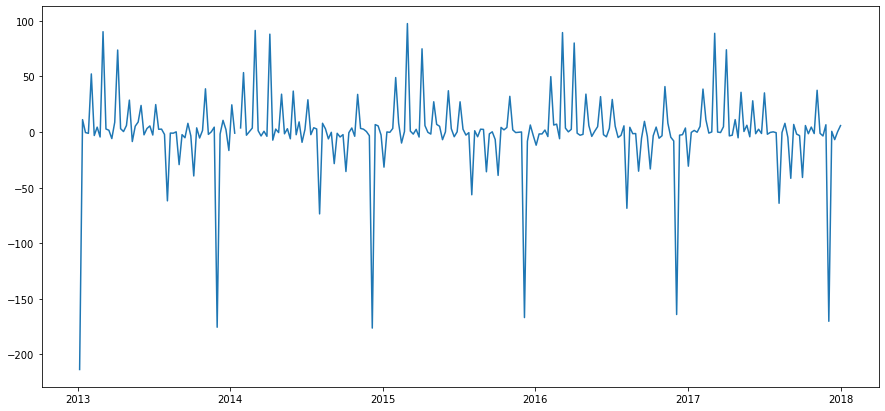

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['sales_log_diff1'].resample('W').sum(),label="sales")
plt.show()

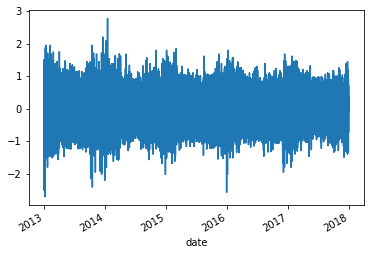

In [ ]:
train['sales_log_diff'] = train['adj_log'] - train['adj_log'].shift(7)
train['sales_log_diff'].dropna().plot()

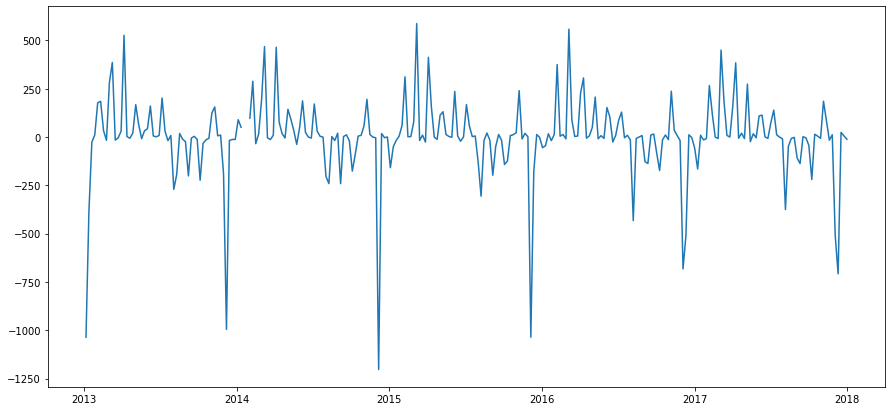

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['sales_log_diff'].resample('W').sum(),label="sales")
plt.show()

In [ ]:
train['sales_log_diff'].dropna()

date
2013-01-08   -0.367725
2013-01-09    0.087011
2013-01-10   -0.441833
2013-01-11   -0.367725
2013-01-12   -0.356675
                ...   
2017-12-27    0.211309
2017-12-28   -0.065597
2017-12-29   -0.013423
2017-12-30   -0.121361
2017-12-31    0.075986
Name: sales_log_diff, Length: 912993, dtype: float64

In [ ]:
stats, p, lags, critical_values = kpss(train['sales_log_diff'], 'ct')

In [ ]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: nan
p-value: nan
num lags: 118
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [ ]:
train

store  item  sales    rolmean     rolstd  sales1  sales_diff_7  \
date                                                                         
2013-01-01      1     1     13        NaN        NaN     NaN           NaN   
2013-01-02      1     1     11        NaN        NaN    -2.0           NaN   
2013-01-03      1     1     14        NaN        NaN     3.0           NaN   
2013-01-04      1     1     13        NaN        NaN    -1.0           NaN   
2013-01-05      1     1     10        NaN        NaN    -3.0           NaN   
...           ...   ...    ...        ...        ...     ...           ...   
2017-12-27     10    50     63  61.250000  13.239919    22.0          12.0   
2017-12-28     10    50     59  61.833333  12.946276    -4.0          -4.0   
2017-12-29     10    50     74  60.833333  11.264048    15.0          -1.0   
2017-12-30     10    50     62  61.583333  10.991388   -12.0          -8.0   
2017-12-31     10    50     82  63.916667  12.146517    20.0           6.0   

             adj_log  adj_sqrt  sales_log_diff  sales_log_diff1  
date                                                             
2013-01-01  2.564949  3.605551             NaN              NaN  
2013-01-02  2.397895  3.316625             NaN        -0.167054  
2013-01-03  2.639057  3.741657             NaN         0.241162  
2013-01-04  2.564949  3.605551             NaN        -0.074108  
2013-01-05  2.302585  3.162278             NaN        -0.262364  
...              ...       ...             ...              ...  
2017-12-27  4.143135  7.937254        0.211309         0.429563  
2017-12-28  4.077537  7.681146       -0.065597        -0.065597  
2017-12-29  4.304065  8.602325       -0.013423         0.226528  
2017-12-30  4.127134  7.874008       -0.121361        -0.176931  
2017-12-31  4.406719  9.055385        0.075986         0.279585  

[913000 rows x 11 columns]

In [ ]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

In [ ]:
monthly_df = monthly_sales(train1)
monthly_df.head()

date  sales
0 2013-01-01  13696
1 2013-01-02  13678
2 2013-01-03  14488
3 2013-01-04  15677
4 2013-01-05  16237

In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='blue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + dt.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

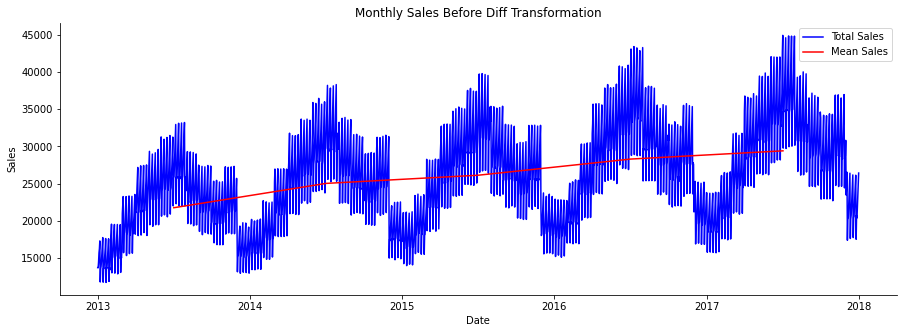

In [ ]:
time_plot(monthly_df, 'date', 'sales', 'Monthly Sales Before Diff Transformation')

In [ ]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('stationary_df.csv')
    return data

In [ ]:
stationary_df = get_diff(monthly_df)

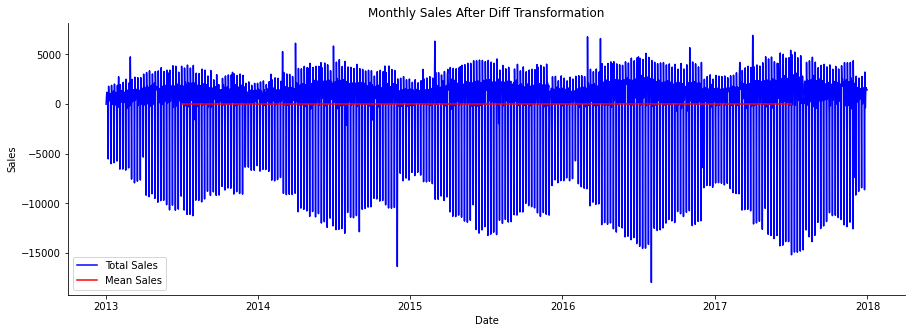

In [ ]:
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

In [ ]:
stationary_df

date  sales  sales_diff
1    2013-01-02  13678       -18.0
2    2013-01-03  14488       810.0
3    2013-01-04  15677      1189.0
4    2013-01-05  16237       560.0
5    2013-01-06  17291      1054.0
...         ...    ...         ...
1821 2017-12-27  20378      -360.0
1822 2017-12-28  21885      1507.0
1823 2017-12-29  23535      1650.0
1824 2017-12-30  24988      1453.0
1825 2017-12-31  26420      1432.0

[1825 rows x 3 columns]

In [ ]:
# KPSS test for stationarity

In [ ]:
stats, p, lags, critical_values = kpss(stationary_df['sales_diff'], 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.015440682782256602
p-value: 0.1
num lags: 25
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
